# 学習の可視化
この章では学習の可視化、各epochでどれほどの損失、正答率が出ているのかをグラフ化していく手法について学びます。<br>
学習サンプルとしてMNISTを使用します。<br>
今回は更に学習データを更に学習データと評価データに分割して学習中の汎化性能も可視化できるようにします。<br>
手元にあるデータを更に分割して逐次モデルを評価することでオーバーフィッティングを検知することが目的です。<br>
コード自体は簡単で各epochごとにlossを配列に記録していき、最後にmatplotlibで表示するだけです。<br>
pytorchでは自前で用意する必要がありますが、kerasではモデルを学習させる関数'fit'の返り値が損失、正答率のログになっています。<br>
また、先ほどの学習を生かして、***ドロップアウト層***を導入し、活性化関数に***relu***を使用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
mnist = datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = (x_train.reshape(-1, 784)/255).astype(np.float32)
x_test  = ( x_test.reshape(-1, 784)/255).astype(np.float32)

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size=0.2)

In [3]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(opyimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, t_train, epochs = 100, batch_size=100, verbose=2, validation_data=(x_val, t_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 - 3s - loss: 0.6443 - accuracy: 0.7956 - val_loss: 0.2138 - val_accuracy: 0.9358
Epoch 2/100
48000/48000 - 2s - loss: 0.3082 - accuracy: 0.9147 - val_loss: 0.1754 - val_accuracy: 0.9500
Epoch 3/100
48000/48000 - 2s - loss: 0.2588 - accuracy: 0.9315 - val_loss: 0.1375 - val_accuracy: 0.9613
Epoch 4/100
48000/48000 - 2s - loss: 0.2293 - accuracy: 0.9404 - val_loss: 0.1293 - val_accuracy: 0.9637
Epoch 5/100
48000/48000 - 2s - loss: 0.2086 - accuracy: 0.9462 - val_loss: 0.1254 - val_accuracy: 0.9649
Epoch 6/100
48000/48000 - 2s - loss: 0.2018 - accuracy: 0.9490 - val_loss: 0.1265 - val_accuracy: 0.9654
Epoch 7/100
48000/48000 - 2s - loss: 0.1952 - accuracy: 0.9512 - val_loss: 0.1258 - val_accuracy: 0.9681
Epoch 8/100
48000/48000 - 2s - loss: 0.1958 - accuracy: 0.9530 - val_loss: 0.1256 - val_accuracy: 0.9681
Epoch 9/100
48000/48000 - 2s - loss: 0.1853 - accuracy: 0.9556 - val_loss: 0.1175 - val_accuracy: 0.9702
Epoch

Epoch 78/100
48000/48000 - 2s - loss: 0.1845 - accuracy: 0.9681 - val_loss: 0.2364 - val_accuracy: 0.9747
Epoch 79/100
48000/48000 - 2s - loss: 0.2099 - accuracy: 0.9667 - val_loss: 0.2257 - val_accuracy: 0.9747
Epoch 80/100
48000/48000 - 2s - loss: 0.1941 - accuracy: 0.9673 - val_loss: 0.2419 - val_accuracy: 0.9742
Epoch 81/100
48000/48000 - 2s - loss: 0.2107 - accuracy: 0.9674 - val_loss: 0.2518 - val_accuracy: 0.9753
Epoch 82/100
48000/48000 - 2s - loss: 0.1952 - accuracy: 0.9687 - val_loss: 0.2489 - val_accuracy: 0.9742
Epoch 83/100
48000/48000 - 2s - loss: 0.2061 - accuracy: 0.9654 - val_loss: 0.2340 - val_accuracy: 0.9744
Epoch 84/100
48000/48000 - 2s - loss: 0.2103 - accuracy: 0.9672 - val_loss: 0.2205 - val_accuracy: 0.9739
Epoch 85/100
48000/48000 - 2s - loss: 0.2182 - accuracy: 0.9674 - val_loss: 0.2239 - val_accuracy: 0.9753
Epoch 86/100
48000/48000 - 2s - loss: 0.2033 - accuracy: 0.9668 - val_loss: 0.2241 - val_accuracy: 0.9747
Epoch 87/100
48000/48000 - 2s - loss: 0.2119 -

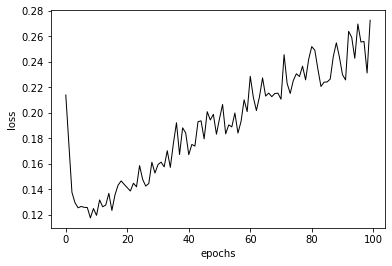

test_loss: 0.353, test_acc: 0.975


In [8]:
val_loss = hist.history['val_loss']
fig = plt.figure()
plt.rc = ('font', family='serif')
plt.plot(range(len(val_loss)), val_loss, color='black', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
loss, acc = model.evaluate(x_test, t_test,verbose=0)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(loss, acc))